<a href="https://colab.research.google.com/github/amitkml/END-NLP-Projects/blob/main/NLPBasic-Session1/END_Sentiment_Analysis_using_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis using Naive Bayes

In this assignment, we will attempt to label tweets with sentiments (positive, neutral and negative) using Naive Bayes classifier. Naive Bayes is a very basic approach to this problem, but gives surprisingly good accuracy sometimes.

**Fill in the Blanks**

## Importing required libraries

In [1]:
import pandas as pd
import re
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [61]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, roc_auc_score, recall_score, precision_score,multilabel_confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

In [14]:
url = 'https://raw.githubusercontent.com/amitkml/END-NLP-Projects/main/NLPBasic-Session1/tweets.csv'
data = pd.read_csv(url, error_bad_lines=False)

## Reading dataset

In [15]:
# data=pd.read_csv('tweets.csv')
data.drop(data.columns[0],axis=1,inplace=True)
data['tweets'] = data['tweets'].astype(str)
data.head()

,tweets,labels
0,Obama has called the GOP budget social Darwini...,1
1,"In his teen years, Obama has been known to use...",0
2,IPA Congratulates President Barack Obama for L...,0
3,RT @Professor_Why: #WhatsRomneyHiding - his co...,0
4,RT @wardollarshome: Obama has approved more ta...,1


## Text processing for the tweets

In [16]:
import nltk 
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
from nltk.tokenize import word_tokenize
from string import punctuation 
from nltk.corpus import stopwords 

stopwords = set(stopwords.words('english') + list(punctuation) + ['AT_USER','URL'])
    
def processTweet(tweet):
    # tweet is the text we will pass for preprocessing 
    # convert passed tweet to lower case 
    # --Fill--
    tweet = tweet.lower().strip()
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'URL', tweet) # remove URLs
    tweet = re.sub('@[^\s]+', 'AT_USER', tweet) # remove usernames
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet) # remove the # in #hashtag
    tweet = word_tokenize(tweet)
    # use work_tokenize imported above to tokenize the tweet
    # --Fill--
    return [word for word in tweet if word not in stopwords]

## Process all tweets

In [20]:
processed=[]

for tweet in data['tweets']:
    
    # process all tweets using processTweet function above - store in variable 'cleaned' 
    # print(type(tweet))
    cleaned=processTweet(tweet)
    processed.append(' '.join(cleaned))

In [21]:
data['processed'] = processed

## Create pipeline and define parameters for GridSearch

In [22]:
from sklearn.multiclass import OneVsOneClassifier

In [23]:
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB())])

tuned_parameters = {
    'vect__ngram_range': [(1, 1), (1, 2), (2, 2)],
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
    'clf__alpha': [1, 1e-1, 1e-2]
}

## Split data into test and train

In [24]:
# split data into train and test with split as 0.2 
# X = data.processed
# y = data.labels
train, test = train_test_split(data, test_size=0.2, random_state=1)
X_train = train['processed'].values
X_test = test['processed'].values
y_train = train['labels']
y_test = test['labels']
# --Fill--

In [25]:
df = pd.Series(y_train).value_counts()       
print(df / len(df))

0    253.333333
1     93.666667
2     21.000000
Name: labels, dtype: float64


## Perform classification (using GridSearch)

In [26]:
kfolds = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

In [27]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

clf = GridSearchCV(text_clf,
                   param_grid = tuned_parameters,
                   cv = 10,
                   scoring="roc_auc_ovr",
                   verbose=1,   
                   n_jobs=-1) 

In [124]:
y_train.head()

443     1
90      1
1131    0
1028    0
262     1
Name: labels, dtype: int64

In [125]:
# # from sklearn import preprocessing
# y_train = preprocessing.label_binarize(y_train, classes=[0, 1, 2])

# y_test = preprocessing.label_binarize(y_test, classes=[0, 1, 2])

In [28]:
from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder()
# y_train = label_encoder.fit_transform(y_train)
# y_test = label_encoder.fit_transform(y_test)

In [127]:
# y_train

In [29]:
clf.fit(X_train, y_train)


Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   13.0s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        pre

In [43]:
print(clf.best_params_)
print(clf.best_score_)

{'clf__alpha': 0.01, 'tfidf__norm': 'l1', 'tfidf__use_idf': True, 'vect__ngram_range': (1, 1)}
0.8708447505937412


In [31]:
clf.score(X_test, y_test)

0.8429548431357582

In [ ]:
# perform GridSearch CV with 10 fold CV using pipeline and tuned_paramters defined above 
# clf = --Fill--
# clf.fit(x_train, y_train)

## Classification report 

In [54]:
pred = clf.best_estimator_.predict(X_test)
pred

array([1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0])

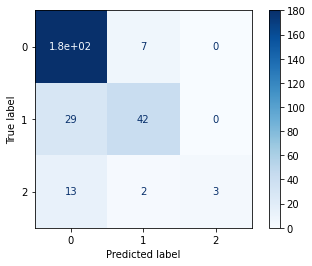

In [62]:
cnf_matrix = confusion_matrix(y_test, pred)
cnf_matrix
class_names = ["0","1","2"]
disp = plot_confusion_matrix(clf.best_estimator_, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
plt.show()

In [37]:
def report_results(model, X, y):
    pred_proba = model.predict_proba(X)[:, 1]
    pred = model.predict(X)        
    # auc = roc_auc_ovr(y, pred_proba)
    auc = roc_auc_score(y, pred_proba,multi_class='ovr')
    
    acc = accuracy_score(y, pred)
    f1 = f1_score(y, pred)
    prec = precision_score(y, pred)
    rec = recall_score(y, pred)
    result = {'auc': auc, 'f1': f1, 'acc': acc, 'precision': prec, 'recall': rec}
    return result

In [ ]:
def report_results(model, X, y):
  class_names = ["0","1","2"]
  disp = plot_confusion_matrix(clf.best_estimator_, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
  plt.show()

In [59]:
# report_results(clf.best_estimator_, X_test, y_test)

AxisError: ignored

In [ ]:
# print classification report after predicting on test set with best model obtained in GridSearch
--Fill--

     |████████████████████████████████| 71kB 2.7MB/s 


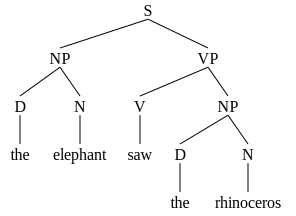

In [64]:
!pip install svgling
import svgling
svgling.draw_tree(("S", ("NP", ("D", "the"), ("N", "elephant")), ("VP", ("V", "saw"), ("NP", ("D", "the"), ("N", "rhinoceros")))))

## Important:

In [39]:
counts = data.labels.value_counts()
print(counts)

0    947
1    352
2     81
Name: labels, dtype: int64


We can see above that the class distribution is highly imbalanced, this would not lead to good sampling of the data for the classifier. For your learning, try using [SMOTE](https://imbalanced-learn.readthedocs.io/en/stable/api.html) to oversample the minority classes and then evaluate the performance with Naive Bayes and compare.